# Importing all moldules

In [68]:
import alpha_vantage
import pandas
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import datetime

# CLASS ScriptData

In [69]:
class ScriptData(dict):

    global libray 
    libray = dict()

    def __getitem__(self,key):
        #print(type(lb[key]))
        #print(libray[key])
        return libray[key]


    def __setitem__(self, i, o):
        pass
    
    
    
    def __contains__(self, o):
        for key in libray.keys():
            if key == o:
                return True
            
        return False
    
    # __init__ function
    # def __init__(self):
    #     self = Userdict()


    def fetch_intraday_data(self,script):
        key = 'XTP4AMN2N5H9BL51'
        ts = TimeSeries(key,output_format='pandas')
        global data ,meta 
        data, meta = ts.get_intraday(script,interval='60min',outputsize='full')


    def convert_intraday_data(self,script):
        columns=['open','high','low','close','volumn']
        data.columns = columns
        data['timestamp']=data.index
        data.reset_index(drop=True, inplace=True)
        #data['timestamp']=data.index
        libray[script]=data
        #self['GOOGL'] = data
        #print(self[script])




    

In [70]:
script_data = ScriptData()

In [71]:
script_data.fetch_intraday_data('GOOGL')

In [72]:
script_data.convert_intraday_data('GOOGL')

In [73]:
script_data['GOOGL']

,open,high,low,close,volumn,timestamp
0,88.540,88.60,88.4700,88.50,8784.0,2023-01-10 20:00:00
1,88.410,88.55,88.3400,88.55,6931.0,2023-01-10 19:00:00
2,88.490,88.55,88.4200,88.42,19483.0,2023-01-10 18:00:00
3,88.420,88.60,88.2500,88.48,3026302.0,2023-01-10 17:00:00
4,88.035,88.45,87.8669,88.45,3473871.0,2023-01-10 16:00:00
...,...,...,...,...,...,...
596,96.850,98.98,96.1100,98.69,346331.0,2022-11-15 09:00:00
597,96.780,97.33,96.6700,97.25,54853.0,2022-11-15 08:00:00
598,96.880,96.97,96.7000,96.81,21191.0,2022-11-15 07:00:00
599,96.790,96.94,96.7900,96.90,5369.0,2022-11-15 06:00:00


In [74]:
script_data.fetch_intraday_data('AAPL')

In [75]:
script_data.convert_intraday_data('AAPL')

In [76]:
script_data['AAPL']

,open,high,low,close,volumn,timestamp
0,130.7500,130.9900,130.7500,130.9700,55537.0,2023-01-10 20:00:00
1,130.7200,130.7600,130.5800,130.7500,44139.0,2023-01-10 19:00:00
2,130.7100,130.7600,130.7000,130.7200,27857.0,2023-01-10 18:00:00
3,130.7300,130.8000,130.6600,130.7000,1274936.0,2023-01-10 17:00:00
4,130.1150,130.7500,129.7600,130.7500,8685783.0,2023-01-10 16:00:00
...,...,...,...,...,...,...
598,149.7371,152.5372,147.7232,152.1776,981979.0,2022-11-15 09:00:00
599,149.7307,150.0603,149.5210,150.0603,158261.0,2022-11-15 08:00:00
600,150.0004,150.1502,149.6908,149.7507,64567.0,2022-11-15 07:00:00
601,149.8006,150.0803,149.8006,149.9504,25346.0,2022-11-15 06:00:00


In [77]:
'GOOGL' in script_data

True

In [78]:
'AAPL' in script_data 

True

In [79]:
'UNCLE' in script_data

False

# Indicator method


In [80]:
def indicator1(df,timeperiod=10):
    df1 = pandas.DataFrame()
    df1['indicator'] = df['close'].rolling(timeperiod).mean()
    return df1

In [81]:
indicator1(script_data['GOOGL'], timeperiod=5)

,indicator
0,NaN
1,NaN
2,NaN
3,NaN
4,88.480
...,...
596,98.684
597,98.329
598,97.743
599,97.525


In [82]:
indicator1(script_data['AAPL'], 5)

,indicator
0,NaN
1,NaN
2,NaN
3,NaN
4,130.77800
...,...
598,152.13486
599,151.90116
600,151.34488
601,150.87726


In [95]:

class Strategy(ScriptData):
    
    def __init__(self,script):
        self.script = script


    def get_script_data(self):
        self.fetch_intraday_data(self.script)
        self.convert_intraday_data(self.script)
        global df
        global indicator_data
        df = data['close'].to_frame()
        df['timestamp'] = data['timestamp']
        df['indicator_data'] = indicator1(df,5)

        

    def get_signals(self):
        
        signals = df
        signals['signal'] = np.nan
        for i in range(len(df)):
            if df.iloc[i-1]['close']>df.iloc[i-1]['indicator_data'] and df.iloc[i]['close'] < df.iloc[i]['indicator_data']:
                signals['signal'][i] = 'BUY'
            elif df.iloc[i-1]['close'] < df.iloc[i-1]['indicator_data'] and df.iloc[i]['close'] > df.iloc[i]['indicator_data']:
                signals['signal'][i] = 'SELL'
        signals = signals.dropna()
        signals.reset_index(inplace = True)
           # [['timestamp','signal']].copy().dropna()
        return signals[['timestamp','signal']].copy()
        
        
    def plot(self):
        #create figure
        plt.figure()

        prices = data
        #define width of candlestick elements
        width = .4
        width2 = .05

        #define up and down prices
        up = prices[prices.close>=prices.open]
        down = prices[prices.close<prices.open]

        #define colors to use
        col1 = 'green'
        col2 = 'red'

        #plot up prices
        plt.bar(up.timestamp,up.close-up.open,width,bottom=up.open,color=col1)
        plt.bar(up.timestamp,up.high-up.close,width2,bottom=up.close,color=col1)
        plt.bar(up.timestamp,up.low-up.open,width2,bottom=up.open,color=col1)

        #plot down prices
        plt.bar(down.timestamp,down.close-down.open,width,bottom=down.open,color=col2)
        plt.bar(down.timestamp,down.high-down.open,width2,bottom=down.open,color=col2)
        plt.bar(down.timestamp,down.low-down.close,width2,bottom=down.close,color=col2)

        #rotate x-axis tick labels
        plt.xticks(rotation=45, ha='right')

        #display candlestick chart
        plt.tight_layout()
        plt.show()

            
         
            
            
        
        
        


In [96]:
strategy = Strategy('NVDA')
strategy.get_script_data()

In [97]:
strategy.get_signals()

,timestamp,signal
0,2023-01-10 11:00:00,SELL
1,2023-01-10 10:00:00,BUY
2,2023-01-10 06:00:00,SELL
3,2023-01-09 20:00:00,BUY
4,2023-01-09 17:00:00,SELL
...,...,...
141,2022-11-15 14:00:00,BUY
142,2022-11-15 13:00:00,SELL
143,2022-11-15 11:00:00,BUY
144,2022-11-15 10:00:00,SELL


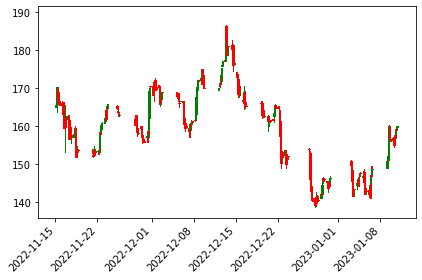

In [ ]:
strategy.plot()